Install the required dependency library brian2hears

In [1]:
pip install brian2hears

     ---------------------------------------- 4.9/4.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 966.6/966.6 kB 20.3 MB/s eta 0:00:00
     ---------------------------------------- 6.5/6.5 MB 41.4 MB/s eta 0:00:00
     ------------------------------------- 532.6/532.6 kB 32.6 MB/s eta 0:00:00
  Created wheel for brian2hears: filename=brian2hears-0.9.2-py3-none-any.whl size=78211 sha256=7154b277fdc2ab6af2994914391bf46327ef1d47f51596a2d6e3c91258540654
  Stored in directory: c:\users\bai\appdata\local\pip\cache\wheels\ae\3f\69\4f132cbd38512792bf026c0b32db6beb438e9cfb00120bf5c9
Successfully built brian2hears
Note: you may need to restart the kernel to use updated packages.


Importing the required function libraries

In [12]:
from brian2 import *
from brian2hears import *

### 1. Generate a human voice with a frequency of 1 kHz and a duration of 1 s, and 1 s of white noise.

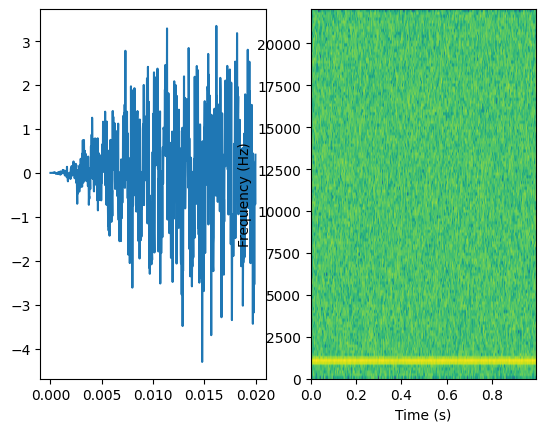

In [13]:
sound1 = tone(1*kHz, 1*second)
sound2 = whitenoise(1*second)

sound = sound1+sound2
sound = sound.ramp()

# The first 20ms of the sound
startsound = sound[slice(0*ms, 20*ms)]

subplot(121)
plot(startsound.times, startsound)
subplot(122)
sound.spectrogram()
show()

### 2. Gammatone filters

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]


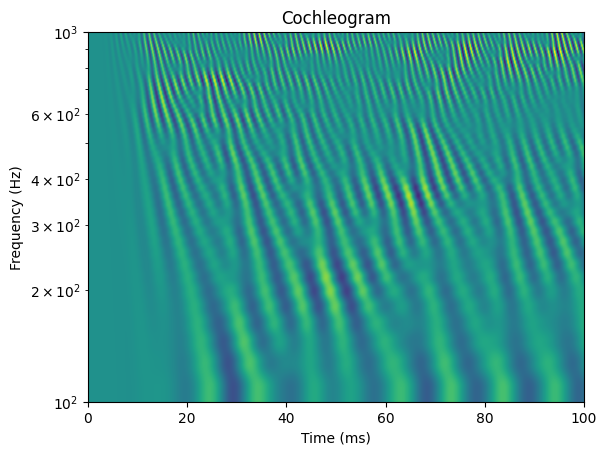

In [35]:
sound = whitenoise(100*ms).ramp()
sound.level = 50*dB

nbr_center_frequencies = 50
b1 = 1.019  #factor determining the time constant of the filters
#center frequencies with a spacing following an ERB scale
center_frequencies = erbspace(100*Hz, 1000*Hz, nbr_center_frequencies)
gammatone = Gammatone(sound, center_frequencies, b=b1)

gt_mon = gammatone.process()

figure()
imshow(gt_mon.T, aspect='auto', origin='lower',
       extent=(0, sound.duration/ms,
               center_frequencies[0]/Hz, center_frequencies[-1]/Hz))
pyplot.yscale('log')
title('Cochleogram')
ylabel('Frequency (Hz)')
xlabel('Time (ms)')

show()

### 3. Online computation

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]


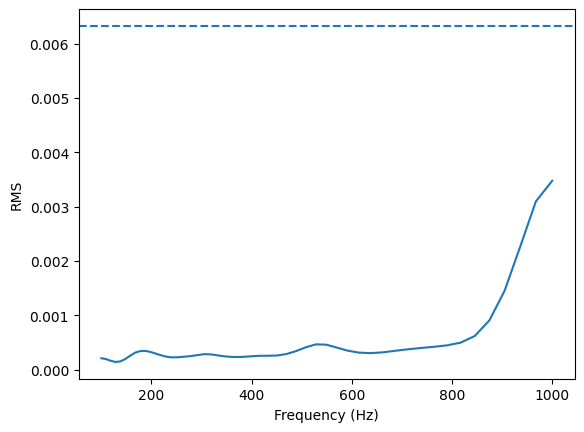

In [38]:
sound1 = tone(1*kHz, .1*second)
sound2 = whitenoise(.1*second)

sound = sound1+sound2
sound = sound.ramp()

sound.level = 50*dB

cf = erbspace(100*Hz, 1*kHz, 50)
fb = Gammatone(sound, cf)

def sum_of_squares(input, running):
    return running+sum(input**2, axis=0)

rms = sqrt(fb.process(sum_of_squares)/sound.nsamples)

sound_rms = sqrt(mean(sound**2))

axhline(sound_rms, ls='--')
plot(cf, rms)
xlabel('Frequency (Hz)')
ylabel('RMS')
show()

### 4. Gammatone Filter

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]


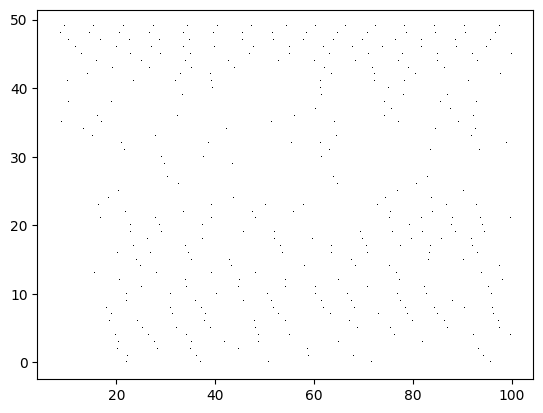

In [33]:
sound1 = tone(1*kHz, .1*second)
sound2 = whitenoise(.1*second)

sound = sound1+sound2
sound = sound.ramp()

cf = erbspace(100*Hz, 1*kHz, 50)
cochlea = Gammatone(sound, cf)

# Half-wave rectification and compression [x]^(1/3)
ihc = FunctionFilterbank(cochlea, lambda x: 3*clip(x, 0, Inf)**(1.0/3.0))

# Leaky integrate-and-fire model with noise and refractoriness
eqs = '''
dv/dt = (I-v)/(1*ms)+0.2*xi*(2/(1*ms))**.5 : 1 (unless refractory)
I : 1 '''
anf = FilterbankGroup(ihc, 'I', eqs, reset='v=0', threshold='v>1', refractory=5*ms, method='euler')

M = SpikeMonitor(anf)
run(sound.duration)
plot(M.t/ms, M.i, ',k')
show()

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]


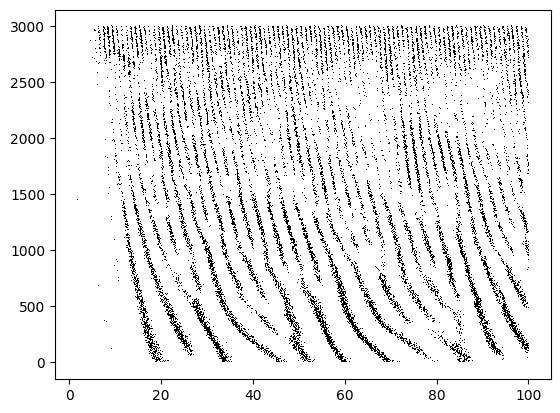

In [36]:
sound1 = tone(1*kHz, .1*second)
sound2 = whitenoise(.1*second)

sound = sound1+sound2
sound = sound.ramp()

cf = erbspace(100*Hz, 1*kHz, 3000)
cochlea = Gammatone(sound, cf)

# Half-wave rectification and compression [x]^(1/3)
ihc = FunctionFilterbank(cochlea, lambda x: 3*clip(x, 0, Inf)**(1.0/3.0))

# Leaky integrate-and-fire model with noise and refractoriness
eqs = '''
dv/dt = (I-v)/(1*ms)+0.2*xi*(2/(1*ms))**.5 : 1 (unless refractory)
I : 1 '''
anf = FilterbankGroup(ihc, 'I', eqs, reset='v=0', threshold='v>1', refractory=5*ms, method='euler')

M = SpikeMonitor(anf)
run(sound.duration)
plot(M.t/ms, M.i, ',k')
show()

3. Online computation

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Ge

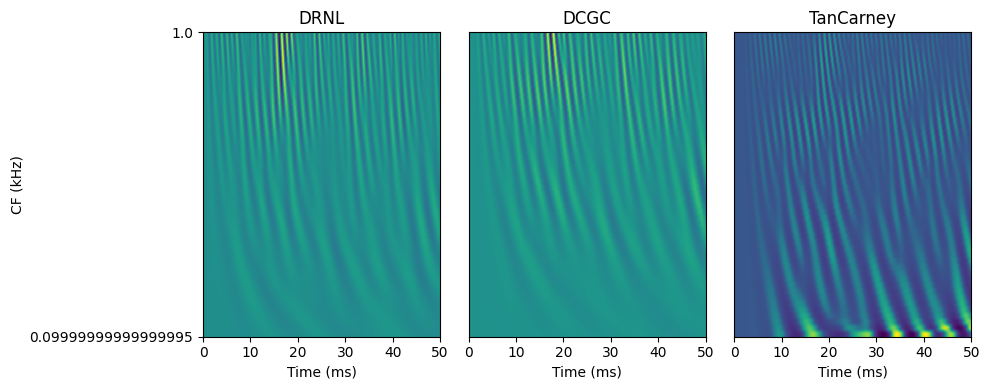

In [44]:
simulation_duration = 50*ms
set_default_samplerate(50*kHz)
sound = whitenoise(simulation_duration)
sound = sound.atlevel(50*dB) # level in rms dB SPL
cf = erbspace(100*Hz, 1000*Hz, 50) # centre frequencies

param_drnl = {}
param_drnl['lp_nl_cutoff_m'] = 1.2

param_dcgc = {}
param_dcgc['c1'] = -3.14

figure(figsize=(10, 4))
for i, (model, param) in enumerate([(DRNL, param_drnl),
                                    (DCGC, param_dcgc),
                                    (TanCarney, None)]):
    fb = model(sound, cf, param=param)
    out = fb.process()
    subplot(1, 3, i+1)
    title(model.__name__)
    imshow(flipud(out.T), aspect='auto', extent=(0, simulation_duration/ms, 0, len(cf)-1))
    xlabel('Time (ms)')
    if i==0:
        ylabel('CF (kHz)')
        yticks([0, len(cf)-1], [cf[0]/kHz, cf[-1]/kHz])
    else:
        yticks([])

tight_layout()
show()